## Exploring the SF City Salary Data

Kaggle Datasets provides data on <a href="https://www.kaggle.com/kaggle/sf-salaries">San Francisco city employee data</a>.

Lets have some fun by doing EDA.

In [3]:
library(dplyr)
library(RSQLite)
library(tidyr)
library(ggplot2)
library(readr)
library(stringr)
library(scales)
library(mixtools)

Loading required package: DBI

Attaching package: ‘readr’

The following objects are masked from ‘package:scales’:

    col_factor, col_numeric

mixtools package, version 1.0.4, Released 2016-01-11
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772.



In [4]:
data_csv <- read_csv("../input/sf-salaries/Salaries.csv", na=c("Not Provided"))
(glimpse(data_csv))

Observations: 148,654
Variables: 13
$ Id               (int) 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,...
$ EmployeeName     (chr) "NATHANIEL FORD", "GARY JIMENEZ", "ALBERT PARDINI"...
$ JobTitle         (chr) "GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY", ...
$ BasePay          (dbl) 167411.18, 155966.02, 212739.13, 77916.00, 134401....
$ OvertimePay      (dbl) 0.00, 245131.88, 106088.18, 56120.71, 9737.00, 860...
$ OtherPay         (dbl) 400184.25, 137811.38, 16452.60, 198306.90, 182234....
$ Benefits         (chr) "", "", "", "", "", "", "", "", "", "", "", "", ""...
$ TotalPay         (dbl) 567595.4, 538909.3, 335279.9, 332343.6, 326373.2, ...
$ TotalPayBenefits (dbl) 567595.4, 538909.3, 335279.9, 332343.6, 326373.2, ...
$ Year             (int) 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 20...
$ Notes            (chr) "", "", "", "", "", "", "", "", "", "", "", "", ""...
$ Agency           (chr) "San Francisco", "San Francisco", "San Francisco",...
$ Status        

NULL

In [5]:
sapply(data_csv, class)

Id     EmployeeName         JobTitle          BasePay 
       "integer"      "character"      "character"        "numeric" 
     OvertimePay         OtherPay         Benefits         TotalPay 
       "numeric"        "numeric"      "character"        "numeric" 
TotalPayBenefits             Year            Notes           Agency 
       "numeric"        "integer"      "character"      "character" 
          Status 
     "character"

In [7]:
sapply(data_csv, typeof)

Id     EmployeeName         JobTitle          BasePay 
       "integer"      "character"      "character"         "double" 
     OvertimePay         OtherPay         Benefits         TotalPay 
        "double"         "double"      "character"         "double" 
TotalPayBenefits             Year            Notes           Agency 
        "double"        "integer"      "character"      "character" 
          Status 
     "character"

<h3> 1. Total Pay and Base Pay </h3>

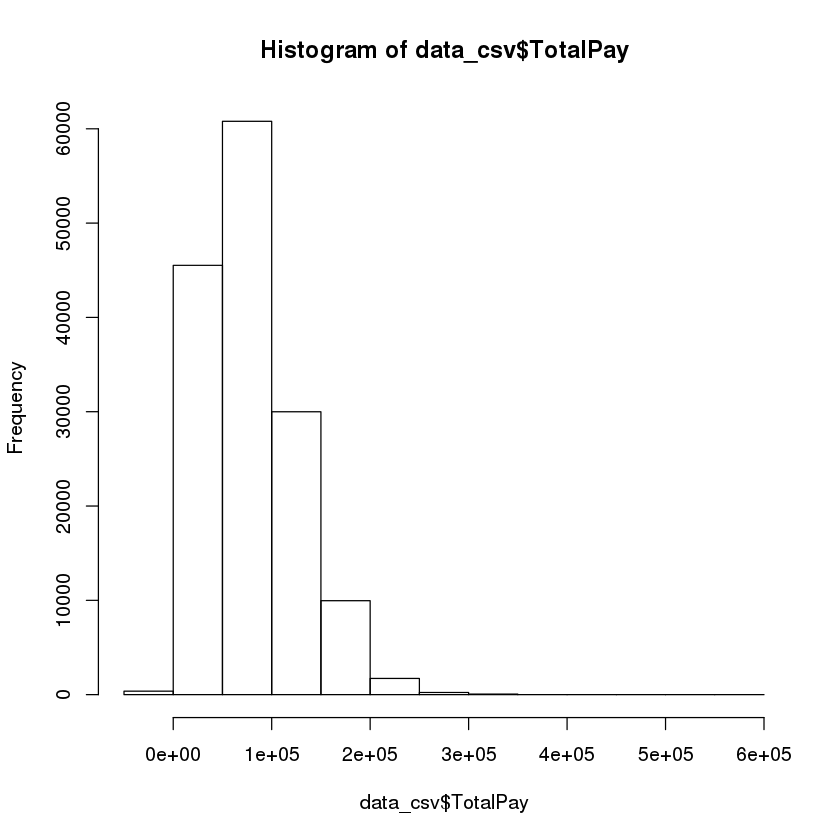

In [13]:
hist(data_csv$TotalPay)

Warning message:
In log(data_csv$TotalPay): NaNs produced

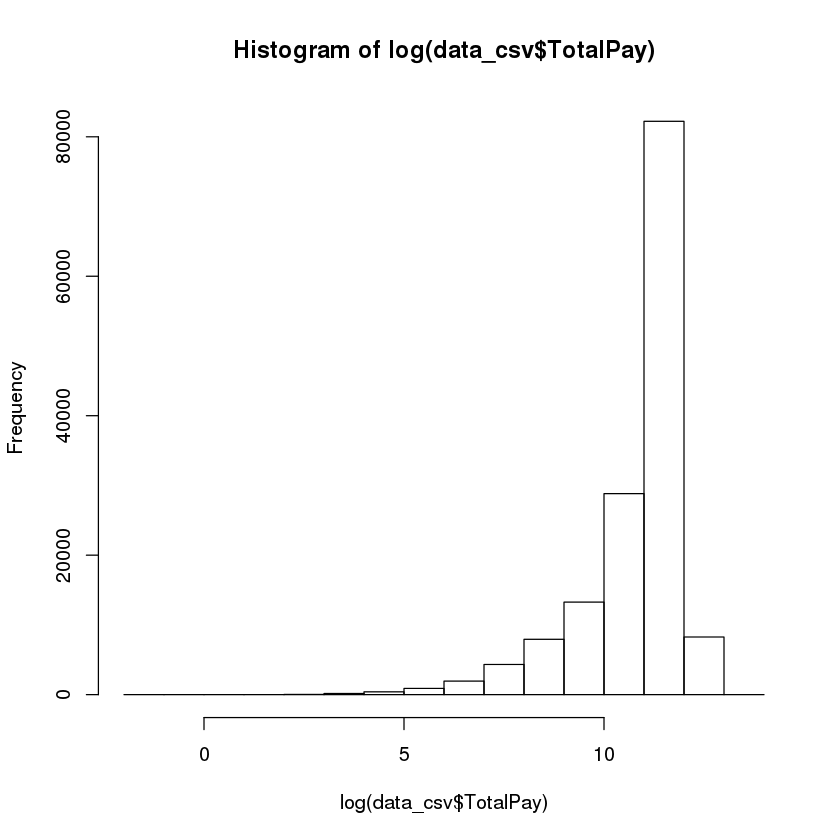

In [14]:
hist(log(data_csv$TotalPay))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


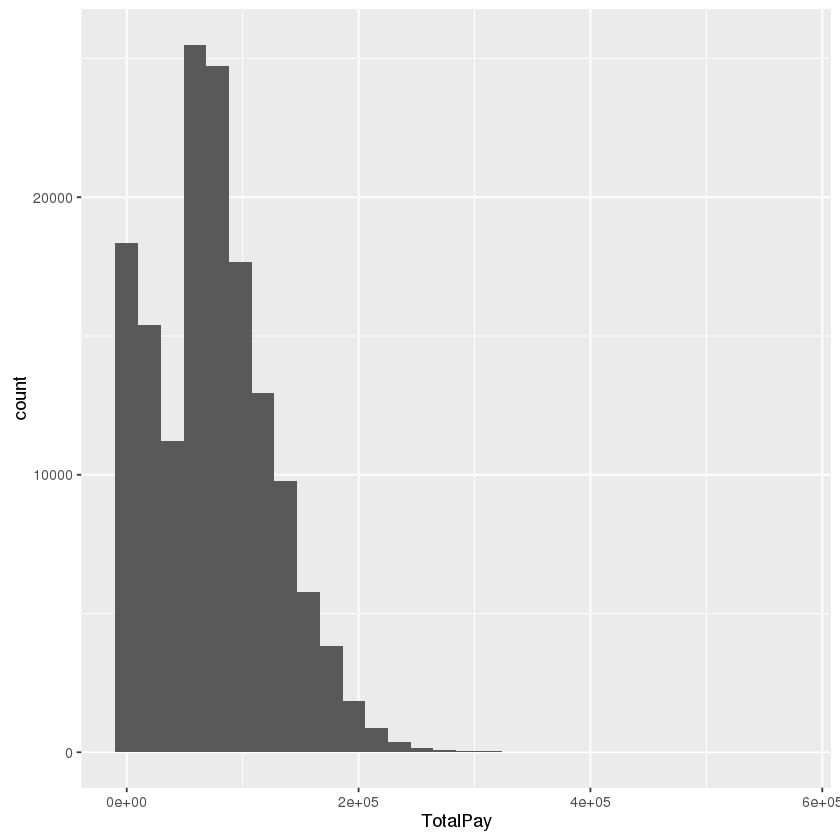

In [12]:
qplot(TotalPay, data=data_csv, geom="histogram")

Warning message:
In log(TotalPay): NaNs producedWarning message:
In log(TotalPay): NaNs produced`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 369 rows containing non-finite values (stat_bin).

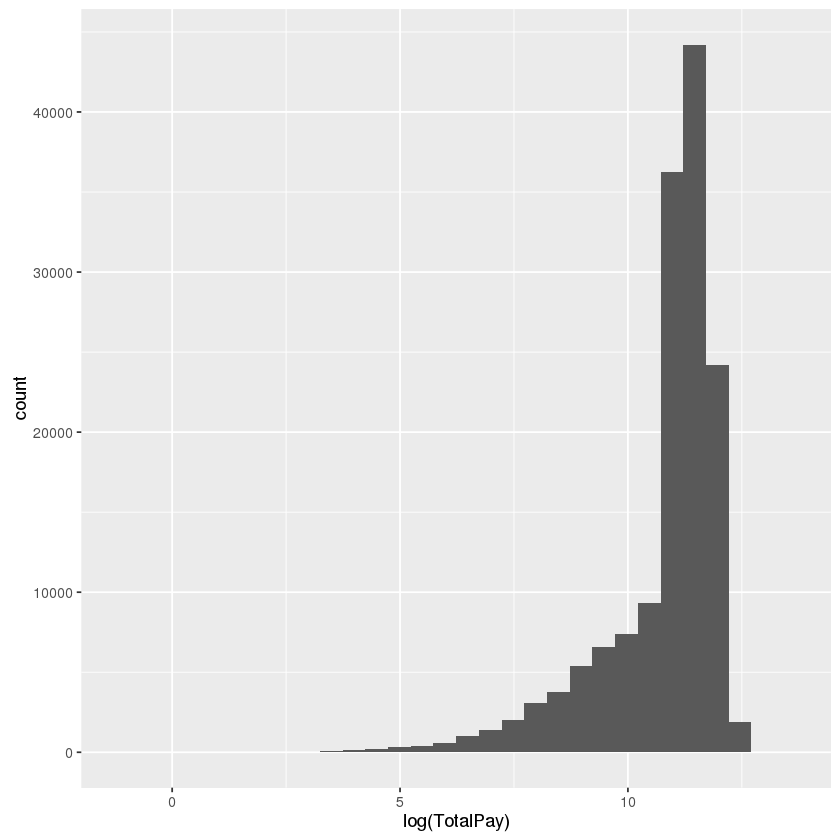

In [10]:
qplot(log(TotalPay), data=data_csv, geom="histogram")

In [ ]:
qplot(TotalPay, data=data_csv, geom="histogram",binwidth=1)

Warning message:
In log(TotalPay): NaNs producedWarning message:
In log(TotalPay): NaNs produced`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 369 rows containing non-finite values (stat_bin).

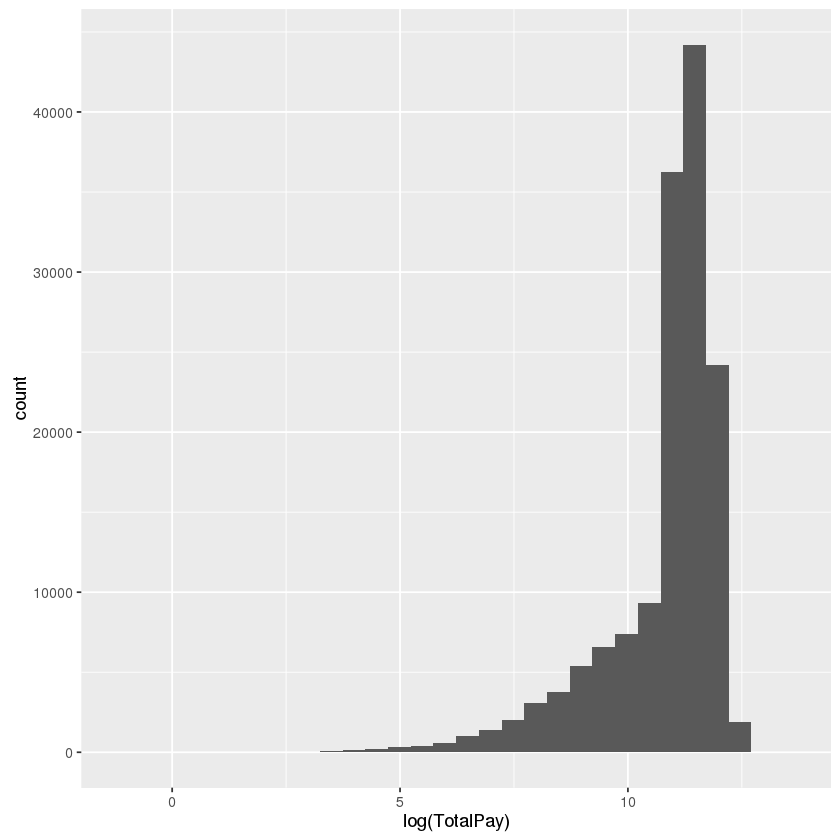

In [18]:
m <- ggplot(data_csv, aes(x=log(TotalPay)))
m + geom_histogram()

Warning message:
In log(TotalPay): NaNs producedWarning message:
In log(TotalPay): NaNs producedWarning message:
In log(TotalPay): NaNs produced`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 369 rows containing non-finite values (stat_bin).Warning message:
: Removed 369 rows containing non-finite values (stat_density).

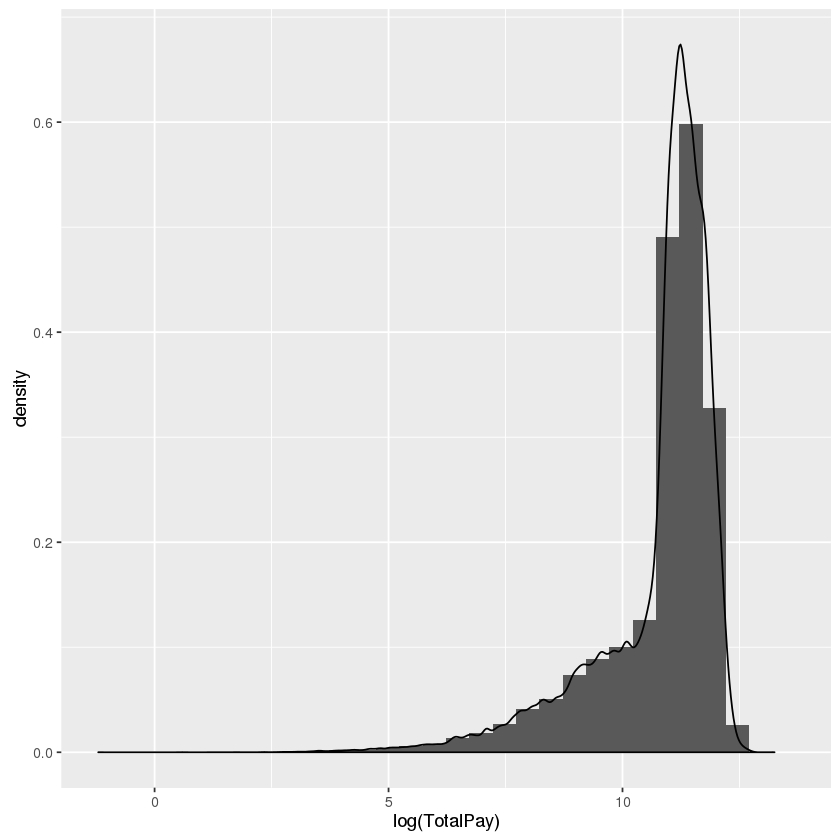

In [19]:
m + geom_histogram(aes(y = ..density..)) + geom_density()

Warning message:
In log(TotalPay): NaNs producedWarning message:
In log(TotalPay): NaNs producedWarning message:
: Removed 369 rows containing non-finite values (stat_bin).

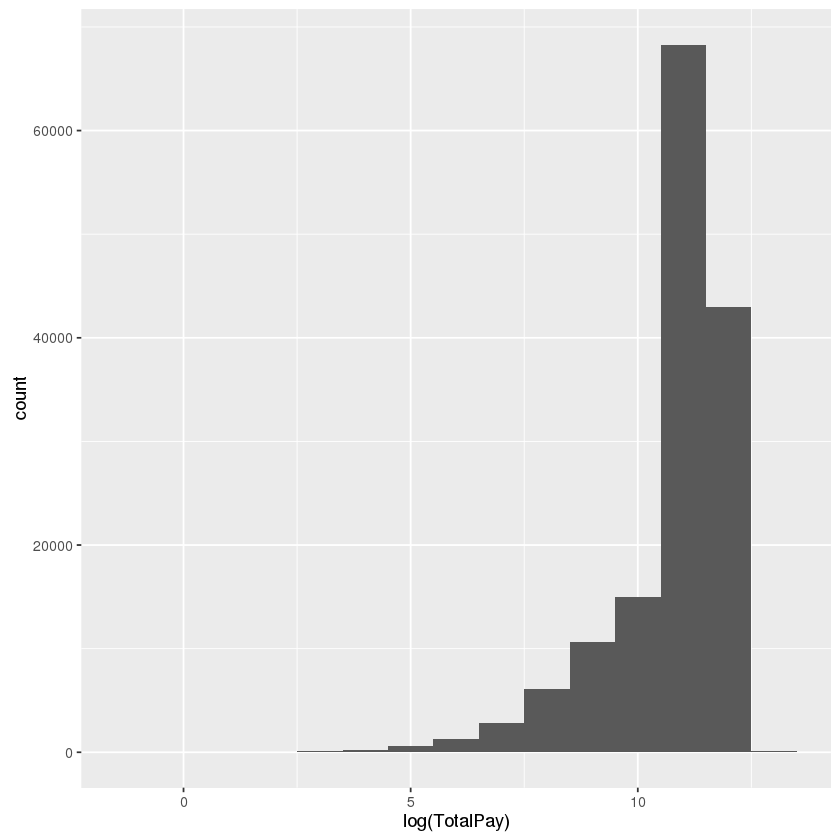

In [20]:
m + geom_histogram(binwidth = 1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 609 rows containing non-finite values (stat_bin).

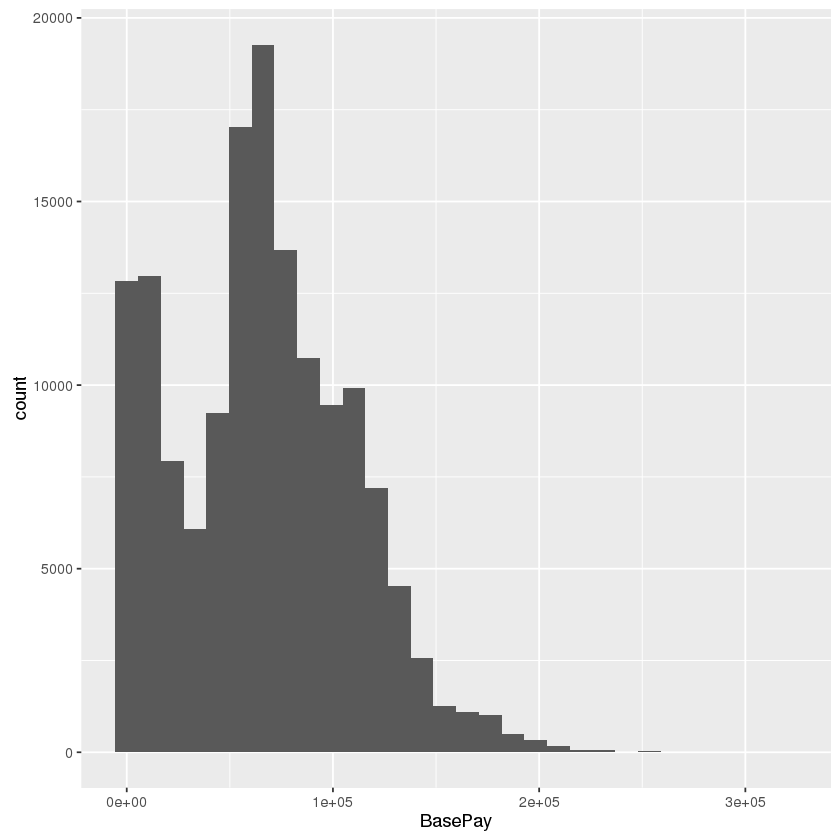

In [34]:
qplot(BasePay, data=data_csv, geom="histogram")

Warning message:
In log(BasePay): NaNs producedWarning message:
In log(BasePay): NaNs produced`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 1918 rows containing non-finite values (stat_bin).

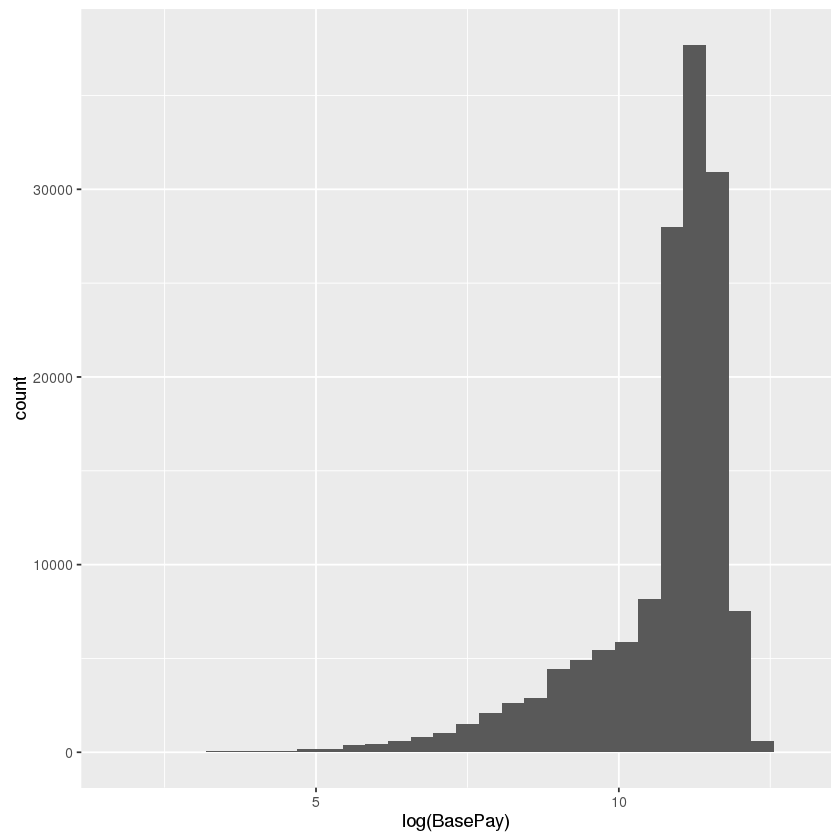

In [35]:
qplot(log(BasePay), data=data_csv, geom="histogram")

Warning message:
In log(BasePay): NaNs producedWarning message:
In log(BasePay): NaNs produced`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 1918 rows containing non-finite values (stat_bin).Warning message:
In log(BasePay): NaNs producedWarning message:
In log(BasePay): NaNs producedWarning message:
In log(BasePay): NaNs produced`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 1918 rows containing non-finite values (stat_bin).Warning message:
: Removed 1918 rows containing non-finite values (stat_density).

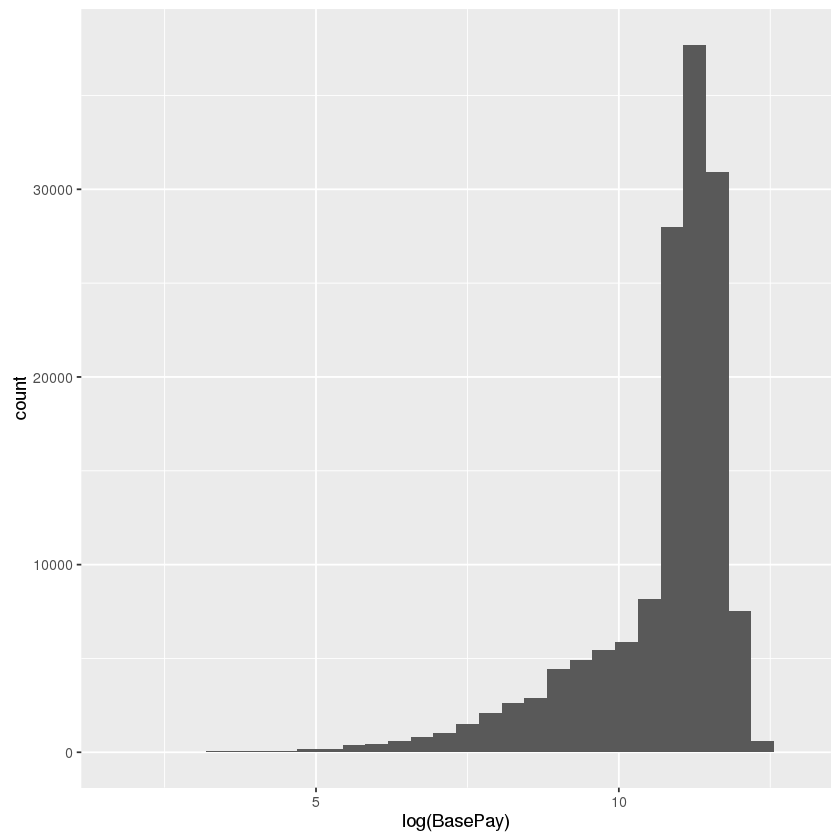

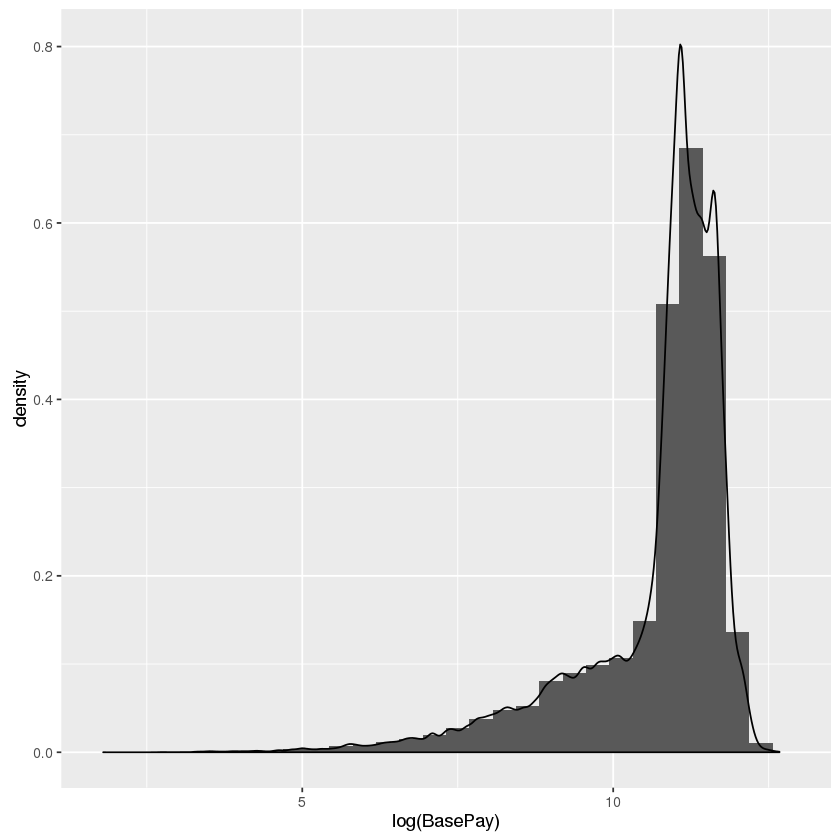

In [37]:
m <- ggplot(data_csv, aes(x=log(BasePay)))
m + geom_histogram()
m + geom_histogram(aes(y = ..density..)) + geom_density()

In [ ]:
p <- ggplot(data_csv, aes(factor(TotalPay), Year))

p + geom_boxplot()

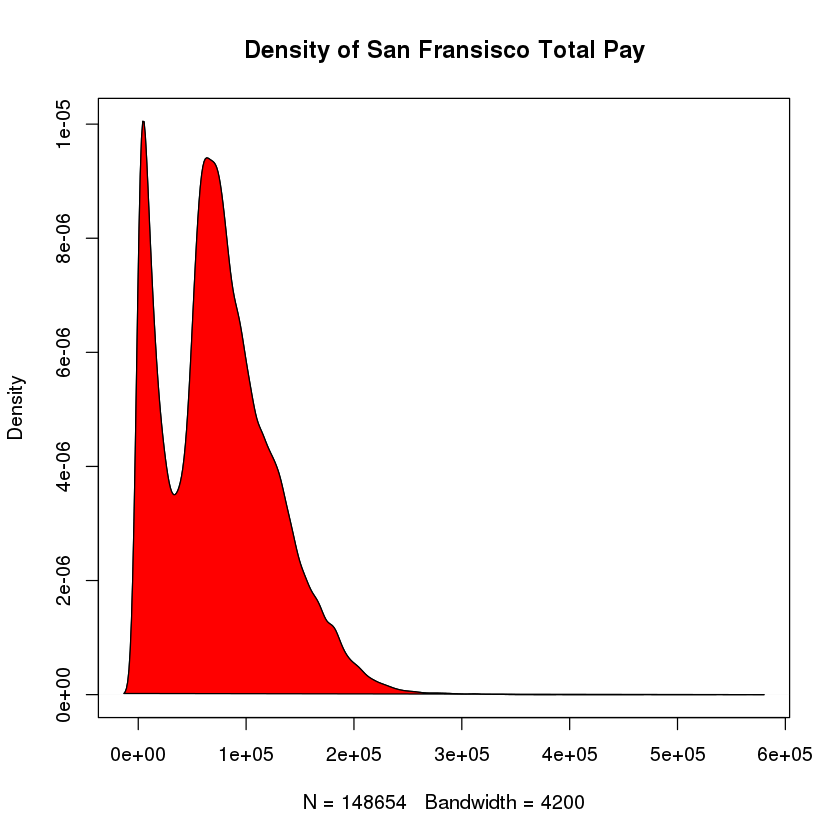

In [25]:
d <- density(data_csv$TotalPay) # returns the density data 
plot(d,main="Density of San Fransisco Total Pay")
polygon(d, col="red", border="black")

The following objects are masked from data_csv (pos = 3):

    Agency, BasePay, Benefits, EmployeeName, Id, JobTitle, Notes,
    OtherPay, OvertimePay, Status, TotalPay, TotalPayBenefits, Year

The following objects are masked from data_csv (pos = 4):

    Agency, BasePay, Benefits, EmployeeName, Id, JobTitle, Notes,
    OtherPay, OvertimePay, Status, TotalPay, TotalPayBenefits, Year



ERROR: Error in legend(locator(1), levels(cyl.f), fill = colfill): invalid coordinate lengths


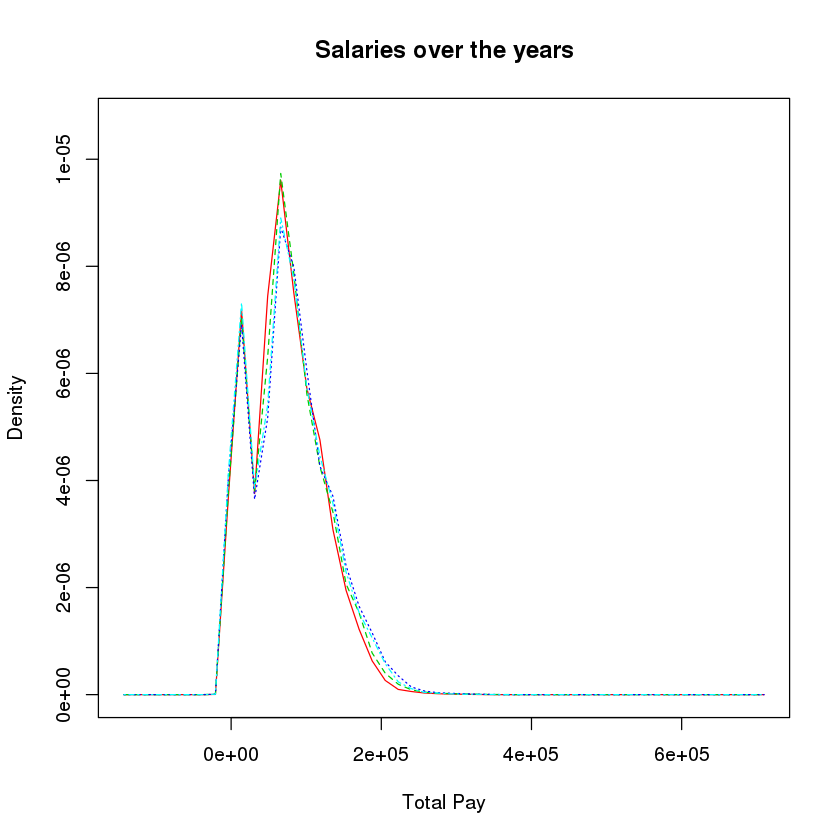

In [28]:
library(sm)
attach(data_csv)

# create value labels 
cyl.f <- factor(Year, levels= c(2011,2012,2013,2014),
  labels = c("2011", "2012", "2013","2014")) 

# plot densities 
sm.density.compare(TotalPay, Year, xlab="Total Pay")
title(main="Salaries over the years")

# add legend via mouse click
colfill<-c(2:(2+length(levels(cyl.f)))) 
legend(locator(1), levels(cyl.f), fill=colfill)

Warning message:
: Removed 609 rows containing non-finite values (stat_density).

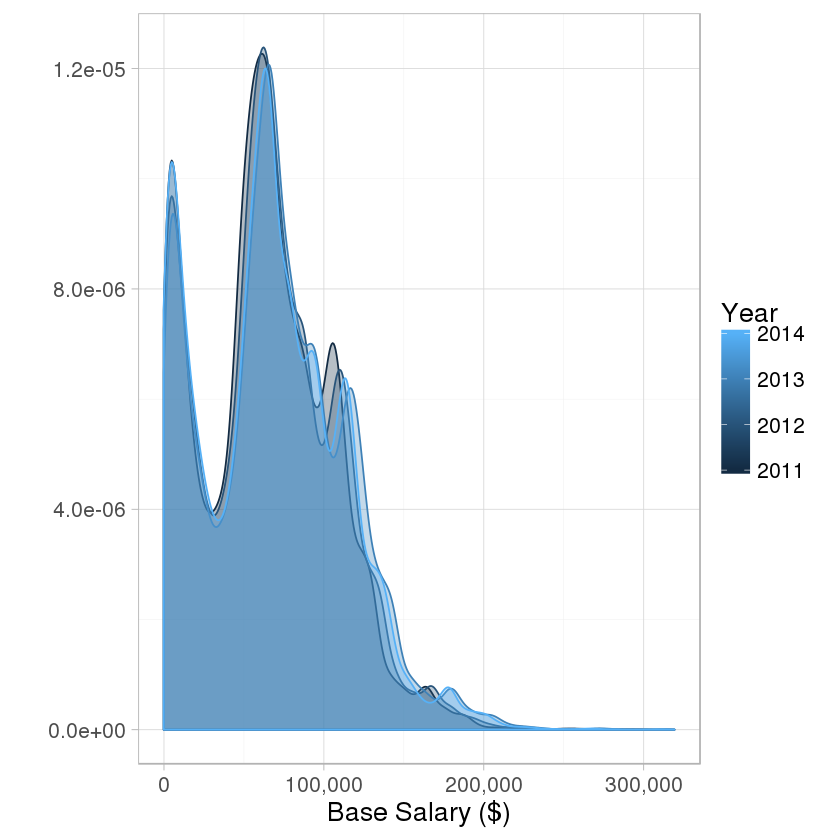

In [31]:
ggplot(data_csv, aes(x=BasePay, group=Year, fill=Year, color=Year)) +
  geom_density(alpha=0.3) +
  theme_light(base_size=16) +
  scale_x_continuous(labels = comma) +
  xlab("Base Salary ($)") +
  ylab("")

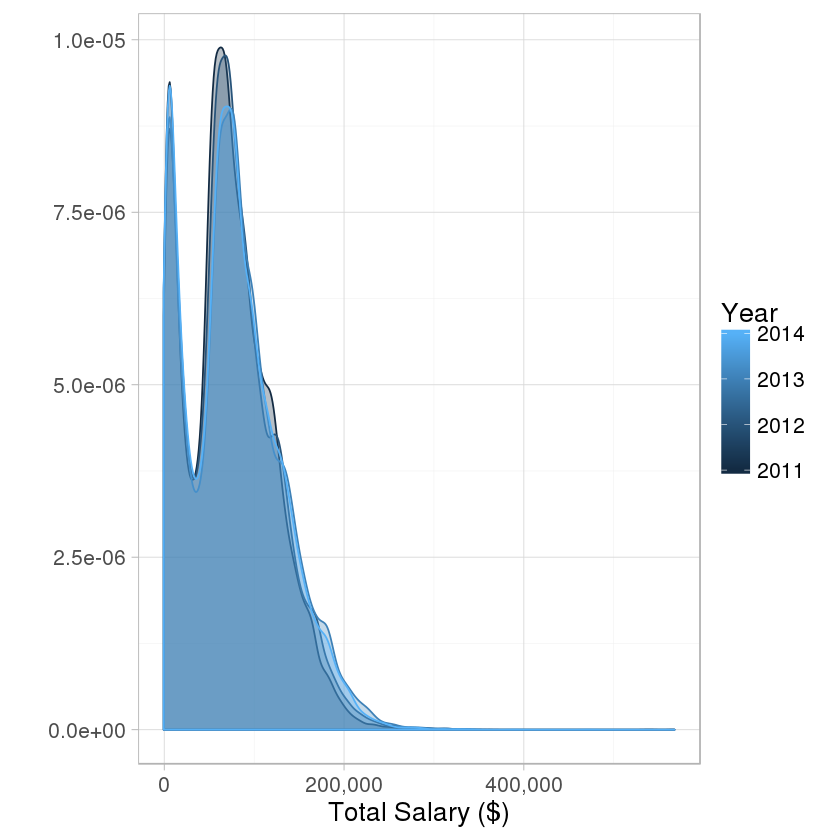

In [39]:
ggplot(data_csv, aes(x=TotalPay, group=Year, fill=Year, color=Year)) +
  geom_density(alpha=0.3) +
  theme_light(base_size=16) +
  scale_x_continuous(labels = comma) +
  xlab("Total Salary ($)") +
  ylab("")

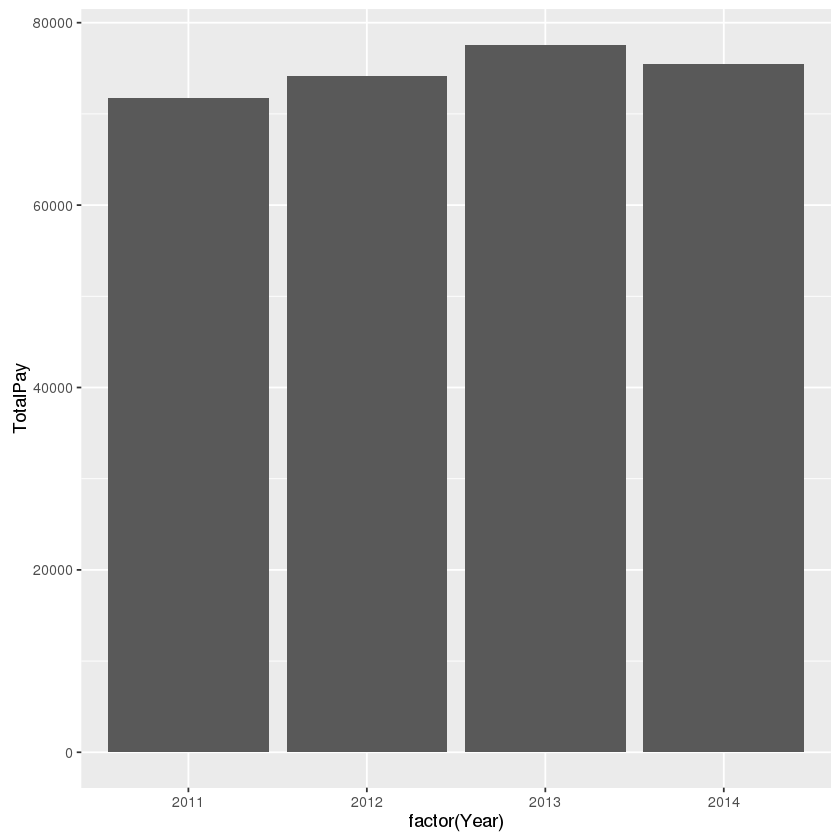

In [29]:
ggplot(data_csv, aes(x=factor(Year), y=TotalPay)) + stat_summary(fun.y="mean", geom="bar")